
1. Morning
    - Data Modelling & Cross Validation
    - data leakage & dependent data
    - imbalanced data (example in python)
    - study: Ebanking Fraud 
    - Q&A
    
    <br>
    
    
2. Afternoon
    - Data Basics & historical perspective
    - __Linear Regression__
    - Trees
    - house prices (regression example in python)
    - Clustering
    - bonus: Hyperparameter Optimization and AutoML
    - Q&A

In [3]:
from IPython.display import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Knowledge Discovery -> Data Mining -> Data Science -> Machine Learning

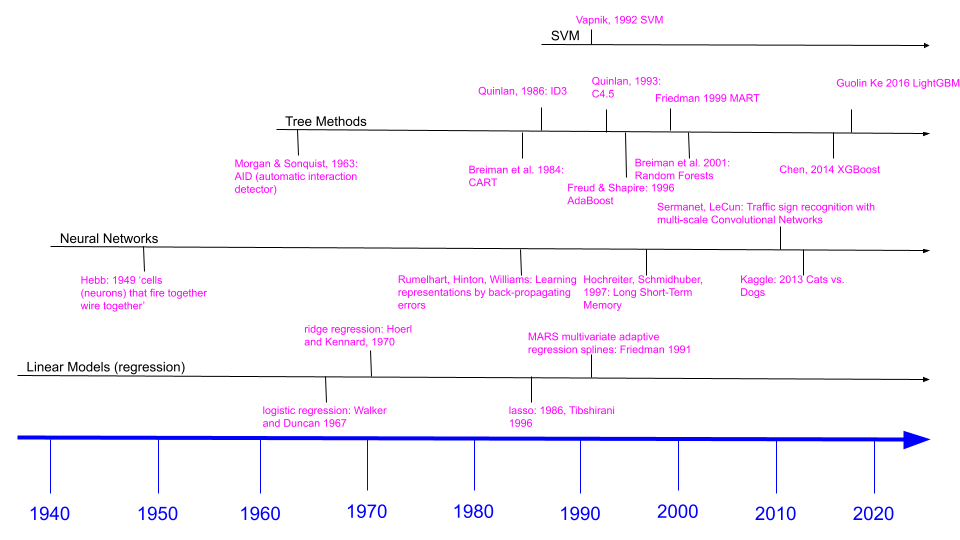

In [4]:
Image("../seminar_skript/DS_Timeline.png")

## Lineare Regression
In der nachfolgenden Zelle werden zuerst Daten geladen, die zur Veranschaulichung der linearen Regression dienen.
Anschliessend wird ein lineares Modell mit Hilfe der der Klasse Lineare Regression aus `sklearn.linear_model` gerechnet. Die Vorhersage (d.h. die Geradengleichung) ergibt sich aus den Koeffizienten durch $y = a + bX$.

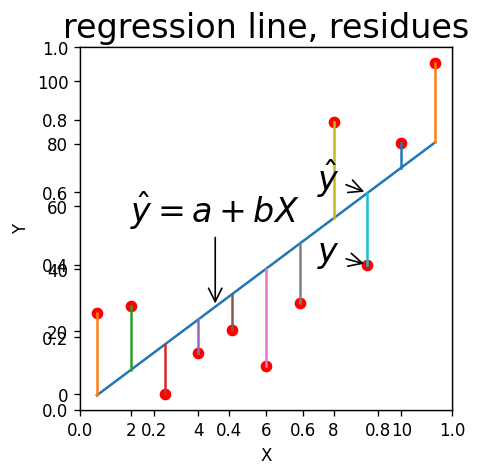

In [3]:
f = plt.figure(figsize=(4, 4), dpi=120)
plt.title(label='regression line, residues', fontdict={'fontsize':20})
axes = f.add_subplot(111)

axes.plot(X, y, 'ro', X, y_hat)
#axes = plt.gca()
axes.set_ylim([np.min(y)-5, np.max(y) +5])
for i in range(len(y)):
    plt.plot((X[i, 0], X[i, 0]), (y[i], y_hat[i]))

axes.set_xlabel('X') 
axes.set_ylabel('Y')

axes.annotate('$y$', xy=(X[-3, 0], y[-3, 0]), xycoords='data',
            xytext=(X[-3, 0] - 1.5, y[-3, 0] + 1), textcoords='data',
            size = 20, arrowprops=dict(arrowstyle="->"))

axes.annotate('$\hat{y}$', xy=(X[-3, 0], y_hat[-3, 0]), xycoords='data',
            xytext=(X[-3, 0] - 1.5, y_hat[-3, 0] + 1), textcoords='data',
            size = 20, arrowprops=dict(arrowstyle="->"))

axes.annotate('$\hat{y} = a + bX$', xy=(X[3, 0] + 0.5, model.coef_ * (X[3, 0] + 0.5) + model.intercept_),
              xycoords='data', xytext=(X[3, 0] + 0.5, 55), textcoords='data',
              horizontalalignment = 'center',
              size = 20, arrowprops=dict(arrowstyle="->"))
plt.show()

#plt.close('all')

Der Plot zeigt die berechnete Regressionsgerade, sowie die Abweichungen (die Fehler) der wirklichen Messwerte von dieser Geraden. Diese Abweichungen werden als __Residuen__ bezeichnet, weil es der Anteil der gemessenen Werte ist, der “übrig bleibt”, d.h. nicht durch das Modell erklärt werden kann. Vorhergesagte Variablen werden meist mit einem Dach (Hut) bezeichnet, sowie $\hat{y}$.

## multivariate case: more than one x variable
Für Multivariate Lineare Regression kann die Schreibweise mit Matrizen zusammengefasst werden. Dafür kann es lohnend sein, sich die Matrizen-Multiplikation noch einmal kurz anzusehen. 


\begin{align*}
    y_1&=a+b_1\cdot x_{11}+b_2\cdot x_{21}+\cdots + b_p\cdot x_{p1}\\
    y_2&=a+b_1\cdot x_{12}+b_2\cdot x_{22}+\cdots + b_p\cdot x_{p2}\\
    \ldots& \ldots\\
    y_i&=a+b_1\cdot x_{1i}+b_2\cdot x_{2i}+\cdots + b_p\cdot x_{pi}\\
\end{align*}

\begin{equation*}
    \begin{bmatrix}
      y_1\\
      y_2\\
      .  \\
      .  \\
      .  \\
      y_i
    \end{bmatrix}
    = a+
    \begin{bmatrix}
      x_{11} & x_{21} & x_{31} & \ldots & x_{p1}\\
      x_{12} & x_{22} & x_{32} & \ldots & x_{p2}\\
      \ldots&\ldots&\ldots&\ldots&\ldots\\
      \ldots&\ldots&\ldots&\ldots&\ldots\\
      \ldots&\ldots&\ldots&\ldots&\ldots\\
      x_{1i} & x_{2i} & x_{3i} & \ldots & x_{pi}\\
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
 b_1\\
      b_2\\
      .\\
      .\\
      .\\
      b_p
    \end{bmatrix}
\end{equation*}

Den konstanten inercept Term ($a$) können wir mit in den Vektor der Parameter $\mathbf{b}$ aufnehmen, indem wir in $\mathbf{X}$ eine Einser-Spalte hinzufügen. Somit wird die Schreibweise sehr kompakt und der intercept $a$ wird nicht mehr explizit aufgeführt:   

\begin{equation*}
     \begin{bmatrix}
      y_1\\
      y_2\\
      .  \\
      .  \\
      .  \\
      y_i
    \end{bmatrix}
    =
    \begin{bmatrix}
      1& x_{11} & x_{21} & x_{31} & \ldots & x_{p1}\\
      1 &  x_{12} & x_{22} & x_{32} & \ldots & x_{p2}\\
      &\ldots&\ldots&\ldots&\ldots&\ldots\\
      &\ldots&\ldots&\ldots&\ldots&\ldots\\
      1& x_{1i} & x_{2i} & x_{3i} & \ldots & x_{pi}
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
      a\\
      b_1\\
      b_2\\
      .\\
      .\\
      b_p
    \end{bmatrix}
  \end{equation*}
  
In Matrizen-Schreibweise können wir jetzt einfach schreiben:
$\mathbf{y} = \mathbf{X}\mathbf{b}$

## Polynomial regression as an example for more than one variable
Um einfach Multivariate Lineare Regression an einem Beispiel zeigen zu können wird die quadratische Regression (ein Spezial-Fall der Multivariaten Regression) eingeführt. Eine neue Variable entsteht durch das Quadrieren der bisherigen univiaraten Variable x. Das Praktische ist, dass sich der Sachverhalt der Multivariaten Regression noch immer sehr schön 2-dimensional darstellen lässt.<br> 
$y = a + b_1 x + b_2 x^2$


Hier ist zu beachten:
* wir haben jetzt zwei Variablen und können folglich unsere Formel in Matrizen-Schreibweise anwenden
* mehr Variablen führen hoffentlich zu einem besseren Modell
* durch den quadratischen Term ist die resultierende Regressions-Funktion keine Gerade mehr.<br>
__Der Ausdruck "linear" in Linearer Regression bedeutet dass die Funktion linear in den Parametern
 $a, \mathbf{b}_\mathbf{1}, \mathbf{b}_\mathbf{2}$ ist. Für alle Werte einer Variablen $\mathbf{x_1}$ gilt der gleiche Parameter $\mathbf{b_1}$.<br>
Es bedeutet nicht, dass die Regressions-Funktion durch eine gerade Linie gegeben ist!__
* ausserdem bedienen wir uns hier eines Tricks: Die Variable $x^2$ müsste eigentlich eine eigene Achse bekommen. Dann wäre die Regressions-Gerade wieder eine gerade Linie - nur lässt sich das leider nicht mehr schön darstellen.


Nachfolgend fügen wir die weitere Variable durch Quadrieren der bisherigen Variable hinzu und berechnen abermals das Lineare Modell aus `sklearn.linear_model`.

(-5.0, 110.77315979942053)

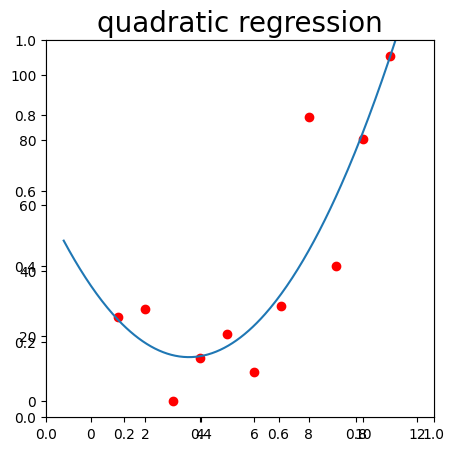

In [7]:
f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='quadratic regression', fontdict={'fontsize':20})
axes = f.add_subplot(111)
axes.plot(X[:,0], y, 'ro', x[:,0], y_hat.reshape((-1,)))
#axes = plt.gca()
axes.set_ylim([np.min(y)-5, np.max(y) +5])

### Overfitting

Nun wird diese Vorgehensweise für weitere Terme höherer Ordnung angewendet. Graphisch lässt sich zeigen, dass die Anpassung des Modells an die Daten immer besser wird, die Vorhersage für __neue Datenpunkte__ aber sehr schlecht sein dürfte. Man sagt dann, das Model __"generalisiert"__ sehr schlecht. Das Polynom hat an vielen Stellen Schlenker und absurde Kurven eingebaut. Dies ist ein erstes Beispiel für __“overfitting”__.<br>  
Einen ‘perfekten’ fit erhält man, wenn man genau so viele Paramter (10 Steigunskoeffizienten + intercept) hat wie Daten-Messpunkte. 


The important points to note here:
* the fit to our empirical y-values gets better
* at the same time, the regression line starts behaving strangly
* the predictions made by the regression line in between the empirical y-values are grossly wrong: this is an example of __overfitting__

(-10.0, 115.77315979942053)

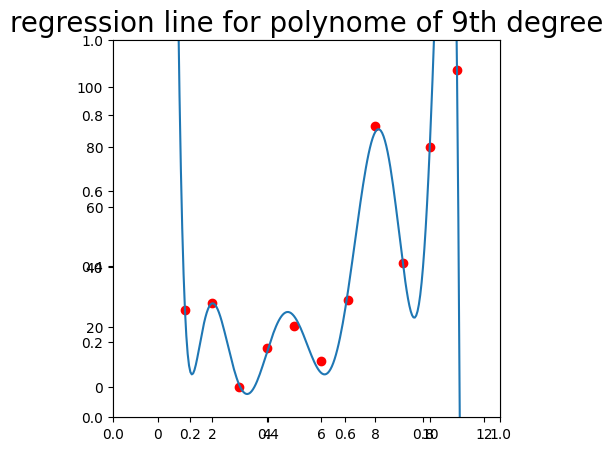

In [10]:
f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='regression line for polynome of 9th degree', fontdict={'fontsize':20})
axes = f.add_subplot(111)

axes.plot(X[:,0], y, 'ro', x[:,0], y_hat.reshape((-1,)))
#axes = plt.gca()
axes.set_ylim([np.min(y)-10, np.max(y) +10])

### perfect fit: as many variables as data samples
A perfect fit is possible as is demonstrated next. We have as many variables (terms derived from x) as observations (data points). So for each data point we have a variable to accommodate it.<br>
__Note__, that a perfect fit is achieved with 10 variables + intercept. The intercept is also a parameter and in this case the number of observations $n$ equals the number of variables $p$, i.e. $p=n$.

(-10.0, 125.77315979942053)

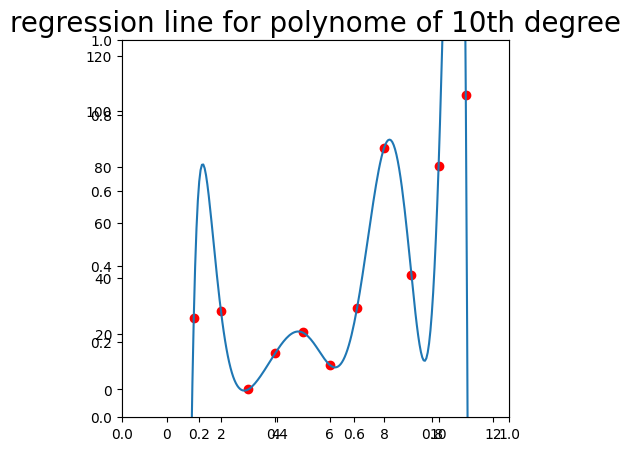

In [13]:
f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='regression line for polynome of 10th degree', fontdict={'fontsize':20})
axes = f.add_subplot(111)

axes.plot(X[:,0], y, 'ro', x[:,0], y_hat.reshape((-1,)))
#axes = plt.gca()
axes.set_ylim([np.min(y)-10, np.max(y) +20])

### Bias-Variance Tradeoff
[Wiki](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)

  - `Bias`: Underfitting
  - `Variance`: Overfitting - the model overfits pecularities of the data sample

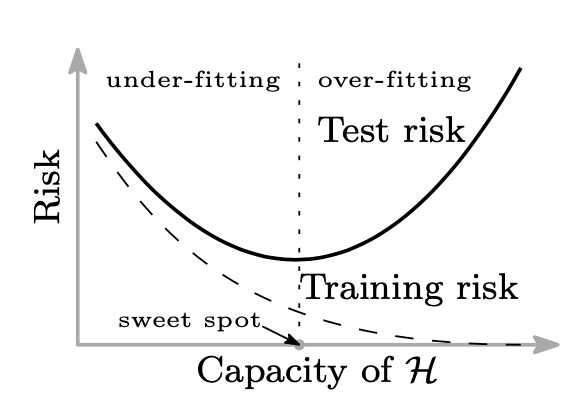

In [16]:
Image('../images/bias_variance_tradeoff.png')

This is the perspectiv of classical statistics:
  - more parameters lead to overfitting
  - the results of models with many parameters are not reliable (due to the high variance)
  - with more parameters it's harder for single parameters to reach the significance threshold (statistical testing)
  - smaller models are better (epistemology: prefer simpler solutions if they are as good as the more complex ones)
  
But neural networks are heavily over-parameterized with far more weight-parameters than independent samples in the training data. How comes they generalize quite well?


Following [Belkin et al., 2019](https://arxiv.org/abs/1812.11118) and [Dar et al., 2021](https://arxiv.org/abs/2109.02355): 
  - When we have as many parameters as data samples, the number of solutions is very constrained. The model has to "stretch" to reach the interpolation threshold with a limited capacity. This explains the weird loops the polynomial makes.<br>
  - When we have more parameters than data points the space of interpolating solutions opens-up, actually allowing optimization to reach lower-norm interpolating solutions. These tend to generalize better, and that's why you get the second descent on test data.

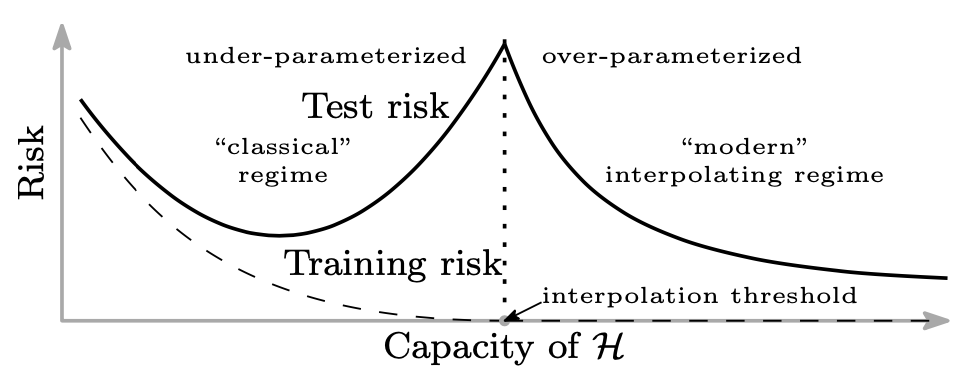

In [17]:
Image('../images/double_descent.png')

For the interested reader:
  - [On the Bias-Variance Tradeoff: Textbooks Need an Update](https://www.bradyneal.com/bias-variance-tradeoff-textbooks-update)
  - [Double Descent](https://medium.com/mlearning-ai/double-descent-8f92dfdc442f)
  - [Deep Double Descent](https://openai.com/blog/deep-double-descent/)
  - [Are Deep Neural Networks Dramatically Overfitted?](https://lilianweng.github.io/lil-log/2019/03/14/are-deep-neural-networks-dramatically-overfitted.html#modern-risk-curve-for-deep-learning)

# Dealing with overfitting
Wie wir gesehen haben tendiert klassische Lineare Regression zu 'overfitting' sobald es wenige Datenpunkte gibt und mehrere Koeffizienten berechnet werden. <br>
Eine Lösung für dieses Problem ist, die Koeffizienten $b_1, b_2, b_3, \ldots$ kleiner zu machen. Dies kann erreicht werden, wenn der Fehler der Regression mit grösseren Koeffizienten auch grösser wird. Um nun das Minimum der Fehlerfunktion zu finden ist ein probates Mittel, die Koeffizienten kleiner zu machen und somit implizit 'overfitting' zu verhindern.<br>
Parameter können jetzt nur noch sehr gross werden, wenn dadurch gleichzeitig der Fehler stark reduziert werden kann.

Nachfolgend wird ein Strafterm ('penalty') für grosse Parameter eingeführt. Im Falle der Ridge-Regression gehen die Koeffizienten quadriert in die Fehlerfunktion mit ein. Der Gewichtungsfaktor $\lambda$ bestimmt die Höhe des Strafterms und ist ein zusätzlicher Parameter für den -- je nach Datensatz -- ein optimaler Wert gefunden werden muss.

## Ridge regression

Remember this formula:
\begin{equation}
\label{eq:1}
\sum_i^{n}(y_i - \hat{y_i})^2 = \sum_i^{n}[y_i - (a + b\cdot x_i)]^{2}
\end{equation}

To make the error term larger for extrem values of $b$, we could simply add $\lambda\cdot b^2$ to the error:

\begin{equation}
\label{eq:2}
\sum_i^{n}(y_i - \hat{y_i})^2 + \lambda b^2= \sum_i^{n}[y_i - (a + b\cdot x_i)]^{2}+ \lambda b^2
\end{equation}

The parameter $\lambda$ is for scaling the amount of shrinkage.
Die beiden Ausdrücke 
\begin{equation}
\label{eq:fehler}
\sum_i^{n}[y_i - (a + b\cdot x_i)]^{2}
\end{equation} und 
\begin{equation}
\label{eq:ridge_error}
\lambda b^2
\end{equation} 
sind wie Antagonisten. Der Koeffizient $b$ darf nur gross werden, wenn er es vermag $\eqref{eq:fehler}$ stark zu verkleinern, so dass der Zugewinn in $\eqref{eq:fehler}$ den Strafterm in $\eqref{eq:ridge_error}$ überwiegt.


For two variables we can write:

\begin{equation*}\sum_i^{n}(y_i - \hat{y_i})^2 + \lambda b_1^2 + \lambda b_2^2= \sum_i^{n}[y_i - (a + b_1\cdot x_{i1} + b_2\cdot x_{i2})]^{2}+ \lambda b_1^2 + \lambda b_2^2\end{equation*}

And in matrix notation for an arbitrary number of variables:
\begin{align*}
    \text{min}=&(\mathbf{y}-\hat{\mathbf{y}})^2 + \lambda \mathbf{b}^2=(\mathbf{y}-\mathbf{X}\mathbf{b})'(\mathbf{y}-\mathbf{X}\mathbf{b}) + \lambda \mathbf{b}'\mathbf{b}
\end{align*}
  
  

### example of ridge regression
Next, we will apply ridge regression as implemented in the python `sklearn` library and compare the results to the linear algebra solution. Note, that we have to center the variables.
* we can center $\mathbf{X}$ and $\mathbf{y}$ and display the result in the centered coordinate system
* or we can center $\mathbf{X}$ and add the mean of $\mathbf{y}$ to the predicted values to display the result in the original coordinate system. This approaches allows for an easy comparison to the overfitted result

Die Zeile `Xc = X - np.mean(X, axis=0)` standardisiert die Variablen auf den Mittelwert von 0

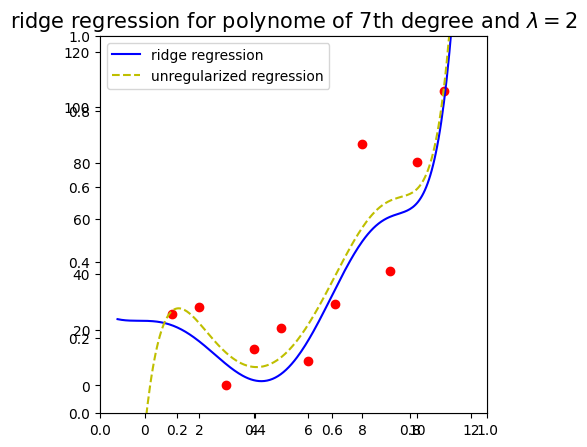

In [21]:
# here we add the mean of y to the predictions to display results in original coord. system
y_hat = np.dot(xc , params)  + np.mean(y)

f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='ridge regression for polynome of 7th degree and $\lambda=2$', 
          fontdict={'fontsize':15})
axes = f.add_subplot(111)

axes.plot(X[:,0], y, 'ro')
axes.plot( x[:,0], y_hat.reshape((-1,)), 'b-', label='ridge regression')
#axes = plt.gca()
axes.set_ylim([np.min(y)-10, np.max(y) +20])

# now the overfitted solution
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(X, y)
y_overfitted = np.dot(x , modelLR.coef_.T)  + modelLR.intercept_
axes.plot(x[:,0], y_overfitted, 'y--', label='unregularized regression')
leg = axes.legend()

Now, it becomes clear why Ridge Regression was invented before Lasso Regression. We have a analytical solution. Ridge is nearer to 'old school statistics' than Lasso is.

## Lasso

Alternativ zu einem quadratischen Strafterm $b^2$ könnte man auch den absoluten Wert nehmen $|b|$. In diesem Fall erhält man die sog.~Lasso Regression; $\lambda\cdot |b|$ wird zum Vorhersage-Fehler addiert:

$$\sum_i^{n}(y_i - \hat{y_i})^2 + \lambda |b|= \sum_i^{n}[y_i - (a + b\cdot x_i)]^{2}+ \lambda |b|$$

Für zwei Variablen würde man folglich schreiben:

$$\sum_i^{n}(y_i - \hat{y_i})^2 + \lambda |b_1| + \lambda |b_2|= \sum_i^{n}[y_i - (a + b_1\cdot x_{i1} + b_2\cdot x_{i2})]^{2}+ \lambda |b_1| + \lambda |b_2|$$
  
Leider gibt es im Gegesatz zur Ridge Regression keine eindeutige analytische Lösung um die Koeffizienten der Lasso Regression zu erhalten. Hier kommen iterative Verfahren zum Einsatz, wie wir sie in Session 2 kennen lernen werden.<br>
Iterative Verfahren haben sich erst sehr spät durchgesetzt - nicht zuletzt wegen der Rechenleistung die sie benötigen.

### kurzer Einschub: klassische Statistik vs. Machine Learning
* Mathematisch liess sich lange Zeit nur ein lineares Gleichungssystem zuverlässig lösen (Rechenpower). Deshalb wurde Ridge-Regression auch vor Lasso-Regression erfunden. Für ersteres Verfahren gibt es eine analytische Lösung.
* Das lineare Modell setzt voraus, dass alle Variablen darin voneinander unabhängig und normal verteilt sind. Dies trifft auf fast keinen Umstand in unserer Welt zu.
* Konfidenzintervalle und Signifikanzen sind das direkte Resultat dieser Annahmen und der damit verbundenen mathmatischen Lösung - der Inversion der Kreuzprodukt-Matrix - so wie wir das besprochen haben.
* __"Overfitting"__ ist der Begriff, der verwendet wurde, wenn das verwendete mathematische Verfahren die Daten der Stichprobe zu genau repräsentiert und auf neue Daten schlecht generalisiert. 
* Leider wurde __"overfitting"__ oft gleichbedeutend mit zu vielen Variablen verwendet.
* Wird die Grösse der Parameter (die Norm) klein gehalten (Ridge, Lasso) so tritt __"overfitting"__ nicht auf.
* Mittlerweile gibt es zuverlässige Verfahren, die overfitting zu verhindern wissen. Da die Modellannahmen in den Wissenschaften oft nur getroffen wurden, weil es für diese eine analytische Lösung gibt, müssten eigentlich viele Lehrbücher umgeschrieben werden.

### kurzer Einschub: klassische Statistik vs. Machine Learning
* Die Verfahren mit vielen Variablen finden in vielen Anwendungen sehr gute Lösungen und haben einige Anwedungsfelder geradezu revolutioniert (Sprach- und Bilderverarbeitung). 
* Wissenschaftstheoretisch sind die neuen Verfahren nicht hinreichend, aber auch die alten Verfahren sind von geringem Nutzen, wenn die Annahmen falsch sind. 
* Es wird Zeit, bisherige klassische Statistik und Verfahren des maschinellen Lernen miteinander zu versöhnen. Eine neuere, umfassende Theorie muss entwickelt werden.

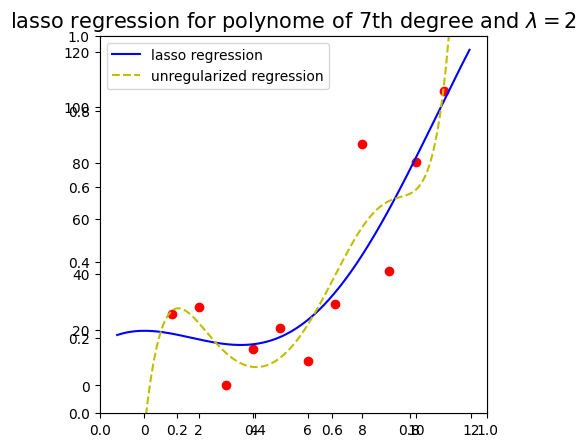

In [23]:
y_hat = np.dot(xc, model.coef_.reshape((-1,1))) + np.mean(y)
f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='lasso regression for polynome of 7th degree and $\lambda=2$', 
          fontdict={'fontsize':15})
axes = f.add_subplot(111)

axes.plot(X[:,0], y, 'ro')
axes.plot( x[:,0], y_hat.reshape((-1,)), 'b-', label='lasso regression')          
#axes = plt.gca()
axes.set_ylim([np.min(y)-10, np.max(y) +20])

# now the overfitted solution
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(X, y)
y_overfitted = np.dot(x , modelLR.coef_.T)  + modelLR.intercept_
axes.plot(x[:,0], y_overfitted, 'y--', label='unregularized regression')
leg = axes.legend()



# Extension: logistic regression and the GLM

Es gibt andere Modelle, die eng verwandt mit der hier besprochenen Linearen Regression sind. Das Prominenteste unter ihnen ist die __Logistische Regression__. Diese Modell gehört zu dem "__Verallgemeinerten Linearen Modell__" (im engl. __generalized lineare model__ (GLM)). Diese Modelle dürfen nicht mit dem "__Allgemeinen Linearen Modell__" (im engl. __general linear model__) verwechselt werden. Letzteres parametrisiert eine Varianzanalyse als ein lineares Modell mit Dummy-Variablen.<br>
Das Verallgemeinerte Lineare Modell erweitert die Lineare Regression um Modelle, deren Fehler nicht normalverteilt sind.<br>
[Dieser Artikel](https://en.wikipedia.org/wiki/Generalized_linear_model#Confusion_with_general_linear_models) in der Wikipedia gibt weitere Auskunft.

## exponential family of distributions
Aus der Perspektive der Modernen Statistik beinhaltet das Verallgemeinerte Lineare Modell verschiedene Lineare Modelle, unter anderem das der klassischen linearen Regression. Eine Verteilung, die in der "exponential family" von Verteilungen ist, kann immer folgendermassen geschrieben werden:

\begin{equation}
f(y| \theta) = \exp\left(\frac{y \theta + b(\theta)}{\Phi} + c(y, \Phi)\right),
\end{equation}

wobei $\theta$ als Kanonischer Parameter bezeichnet wird, welcher eine Funktion von $\mu$ ist dem Mittel. Diese Funktion wird als Kanonische Link-Funktion bezeichnet. Wie wir später an einem Beispiel sehen werden, ist es genau diese Funktion welche die Beziehung zwischen der abhängigen Variablen und den unabhängigen Variablen linearisiert.<br>
Der Vollständigkeit halber: $b(\theta)$ ist eine Funktion des Kanonischen Parameters und ist somit ebenfalls von $\mu$ abhängig. $\Phi$ wird als Streuungsparameter bezeichnet und $c(y, \Phi)$ ist eine Funktion, die sowohl von beobachteten Daten wie auch dem Streuungsparameter abhängig ist.

### Normalverteilung

\begin{eqnarray*}
f(y| \mu, \sigma) =& (2\pi \sigma^2)^{-\frac{1}{2}} \exp\left(-\frac{1}{2}\frac{y^2 -2y\mu + \mu^2}{\sigma^2}\right) \\
 =&\quad \exp \left(\frac{y\mu -\frac{\mu^2}{2}}{\sigma^2} - \frac{1}{2}\left(\frac{y^2}{\sigma^2} + \log(2\pi\sigma^2\right)\right),\quad \text{wobei}
\end{eqnarray*}

$\mu = \theta(\mu)$, d.h. $\mu$ ist der Kanonische Parameter und die Link-Funktion ist die Identitäts-Funktion. Der Mittelwert kann also ohne weitere Transformation direkt modelliert werden, so wie wir es in der klassischen Linearen Regression machen.
Der Streuungsparameter $\Phi$ ist durch $\sigma^2$, die Varianz gegeben. Dies ist die klassische Lineare Regression normalverteilter Variablen

### Poisson distribution
Die Poisson-Verteilung gehört ebenfalls der exponential family von Verteilungen an:

\begin{eqnarray*}
f(y| \mu) =& \frac{\mu^{y} e^{-\mu}}{y!} = \mu^y e^{-\mu}\frac{1}{y!}\\
=& \quad\exp\left(y \log(\mu) - \mu - \log(y!)\right)
\end{eqnarray*}

Die Link-Funktion ist hier $\log(\mu)$. Beachte bitte, dass die Poisson-Verteilung keinen Streuungsparameter besitzt.


### Bernoulli distribution $\Rightarrow$ logistic regression
Zuguter Letzte, die Bernoulli Verteilung, von der wir die Logistische Regression ableiten können.
Die Bernoulli Verteilung eignet sich um binäre Ereignisse zu modellieren, die sich gegenseitig ausschliessen. Ein klassisches Beispiel ist der wiederholte Münzwurf. Die Wahrscheinlichkeit für 'Kopf' wird mit $\pi$ bezeichnet, dir für 'Zahl' mit $(1-\pi)$. Hiermit lässt sich die Wahrscheinlichkeit berechnen, mit einer fairen Münze bei 10 Würfen eine bestimmte Sequenz mit genau 7 Mal 'Kopf' zu erhalten:

\begin{equation}
\pi^7 (1-\pi)^3 = 0.5^7 0.5^3 = 0.5^{10} = 0.0009765625
\end{equation}

__Vorsicht__, wenn wir die Wahrscheinlichkeit für Sequenzen mit genau 7 Mal Kopf berechnen wollen, benötigen wir noch den Binomial-Koeffizienten, der uns die Anzahl an möglichen Sequenzen mit 7 Mal 'Kopf' angibt.<br>

Jetzt zeige ich, wie wir die Bernoulli Verteilung so umschreiben können, dass man ihre Zugehörigkeit zur exponential family von Verteilungen erkennt:

\begin{eqnarray*}
f(y |\pi) =& \pi^y (1-\pi)^{1-y} = \exp\left(y \log(\pi) + (1-y) \log(1-\pi)\right)\\
= & \quad \exp\left(y \log(\pi) + \log(1-\pi) - y\log(1-\pi)\right)\\
=&\quad \exp\left(y\log(\frac{\pi}{1-\pi}) + \log(1-\pi)\right),\quad\text{wobei}
\end{eqnarray*}

sich die Link-Funktion zu $\log(\frac{\pi}{1-\pi})$ ergibt. Diese Funktion wird auch als Logit-Funktion bezeichnet. Die Umkehrfunktion der Logit-Funktion ist die __Logistische Funktion__. Es ist also die Logit-Funktion, die als lineare Kombination der unabhängigen Variablen modelliert wird.
$\log(\frac{\pi}{1-\pi}) = a + b_{1}x_1 + \ldots + b_jx_j$. Wenn wir den rechten Teil dieser Gleichung in die Logistische Funktion einsetzen erhalten wir die geschätzten Wahrscheinlichkeiten:

\begin{equation}
P(y=1 |x) = \frac{\exp(a + b_{1}x_1 + \ldots + b_jx_j)}{1 + \exp(a + b_{1}x_1 + \ldots + b_jx_j)}.
\end{equation}

# Neural Network
Es ist auch möglich Neuronale Netzwerke unter dem Blickwinkel der Linearen Regression zu betrachten. Ein Netzwerk mit nur einer Eingabe-Schicht und einem Neuron wird als Perceptron bezeichnet. Die Aktivierungs-Funktion dieses Neurons ist entweder die Identitäts-Funktion, so wie in der klassischen Linearen Regression oder die Logistische Funktion wie in der Logistischen Regression. In letzterem Fall soll das Perceptron Wahrscheinlichkeiten für binäre Ereignisse bestimmen.

In [41]:
# Image('../images/Regression_as_NN.png')

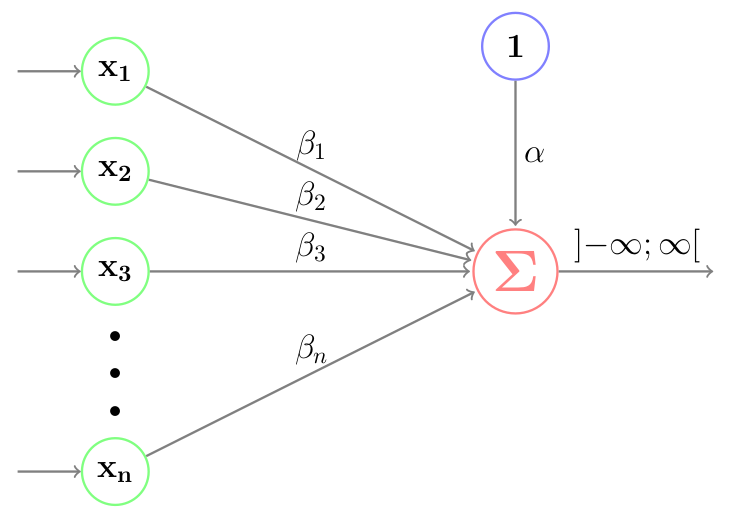

In [38]:
Image("../images/NN_class_reg.png",height=520, width=520)

## classical linear regression
Im Jargon der neural network community werden unsere $b$-Koeffizienten als __Gewichte__ bezeichnet. Der intercept $\alpha$ heisst __bias__.<br>
Erinnert Euch, dass wir den intercept $\alpha$ in den Vektor $\pmb{\beta}$ der $b$-Koeffizienten aufgenomen haben, indem wir eine Einser-Spalte in die Variablen-Matrix $\mathbf{X}$ eingefügt haben. Wir konnten also Schreiben:

\begin{equation*}\mathbf{y} = \mathbf{X} \pmb{\beta}\end{equation*}

In der obigen Graphik könnt ihr sehen, dass im Perceptron die Input-Variablen mit den Gewichten der Verbindungen multipliziert werden und dass der konstante Wert $\alpha$ hinzu addiert wird. Wie in der Linearen Regression werden diese Produkte dann aufsummiert.

Im Kontext Neuronaler Netzwerke wird der Vektor $\pmb{\beta}$ als Netzwerk-Gewichte bezeichnet und wird mit $\mathbf{W}$ angegeben. Wir hatten gelernt, dass Vektoren mit kleinen Buchstaben bezeichnet werden. In einem richtigen Neuronalen Netz haben wir in einer Schicht viel Perceptrons nebeneinander. Alle erhalten aber den Input aus der darunter liegenden Schicht. Fügt man die Gewichts-Vektoren der einzelnen Neurone in eine Matrix zusammen, erhält man $\mathbf{W}$.<br>
Neuronale Netzwerke sind also eigentlich nur viele parallele und hintereinander geschaltete Regressionen, die sehr effizient mit Matrizen-Multiplikation gerechnet werden können.

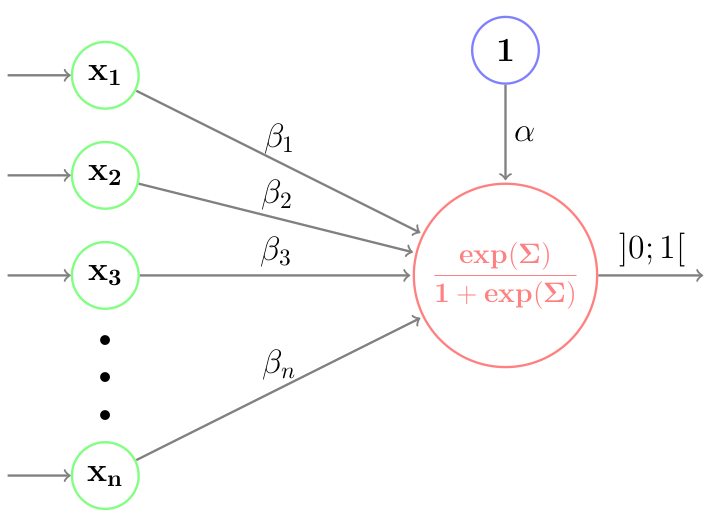

In [39]:
Image("../images/NN_logistic_reg.png", height=520, width=520)

## logistic regression

Für die logistische Aktivierungs-Funktion schreiben wir:
\begin{equation*}
P(y=1 |x) = \frac{\exp(a + b_{1}x_1 + \ldots + b_jx_j)}{1 + \exp(a + b_{1}x_1 + \ldots + b_jx_j)}
\end{equation*}

Diese Funktion nähert sich asymptotisch der $0$ für sehr kleinen Werte und der $1$ für sehr grosse Werte.

### Weight decay

In der Literatur zu Neuronalen Netzwerken wird der $l_2$ Strafterm als "weight decay" bezeichnet.
Dieser Strafterm ist Teil des optimizers und nicht der einzelnen Neurone. Wie auch für Ridge Regression wird weight in die Fehler-Funktion mit aufgenommen:
\begin{equation*}
L' = L + \lambda\sum_i w_i^2, 
\end{equation*}
mit $L$ als Loss (oder Fehler) und den $w_i$ als die Gewichte der eingehenden Verbindungen der Neurone.